In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer_Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Check the Null Values or Not

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there is not any null value present in the data

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Cleaning And EDA

In [7]:
df["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

<Axes: xlabel='Age', ylabel='Count'>

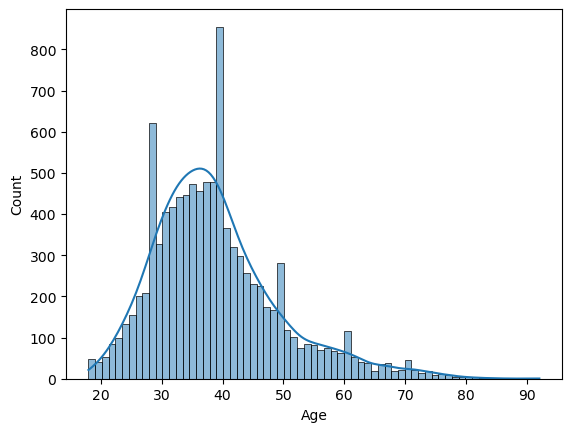

In [8]:
sns.histplot(df["Age"], kde=True)

In [9]:
import scipy.stats as stat

print("Skew : ", stat.skew(df["Age"]))
print("Kurtosis : ", stat.kurtosis(df["Age"]))

Skew :  1.0111685586628079
Kurtosis :  1.3940495456392599


In [10]:
df["Balance"].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [11]:
df["CreditScore"].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [12]:
df["EstimatedSalary"].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [13]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: ylabel='count'>

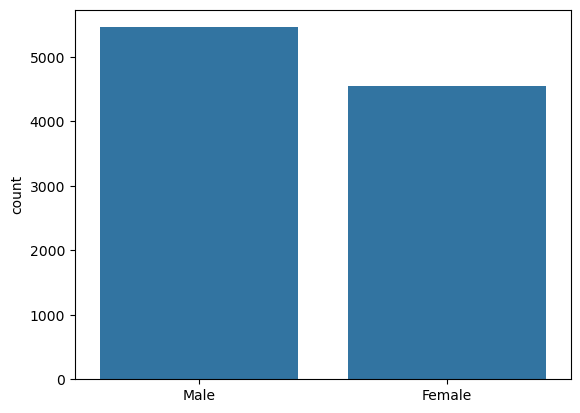

In [15]:
sns.barplot(x=["Male", "Female"], y=df["Gender"].value_counts())

Here We can say there are not very large difference in the male and female

In [16]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: ylabel='count'>

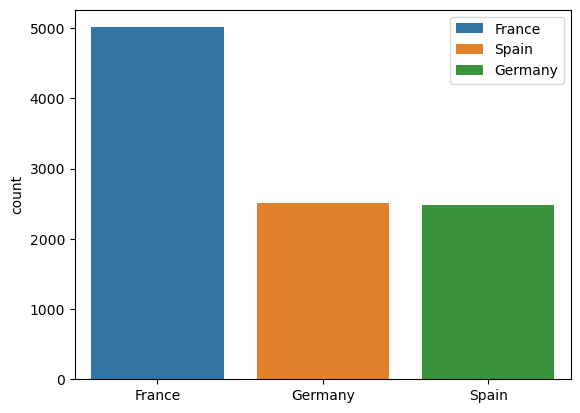

In [18]:
sns.barplot(
    x=["France", "Germany", "Spain"],
    y=df["Geography"].value_counts(),
    hue=df["Geography"].unique(),
)

Here we can say that mostly customes is belong form the France and equally custmore belongs form the Germany and France

In [19]:
df["HasCrCard"].unique()

array([1, 0], dtype=int64)

In [20]:
df["HasCrCard"].value_counts().values

array([7055, 2945], dtype=int64)

<Axes: xlabel='HasCrCard'>

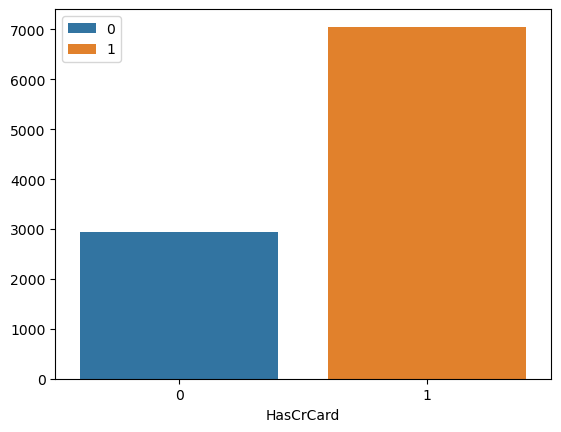

In [21]:
sns.barplot(
    x=df["HasCrCard"].value_counts().keys(),
    y=df["HasCrCard"].value_counts().values,
    hue=df["HasCrCard"].unique(),
)

Here We can say that mostly custmore have the credit card 

In [22]:
df["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [23]:
df["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember'>

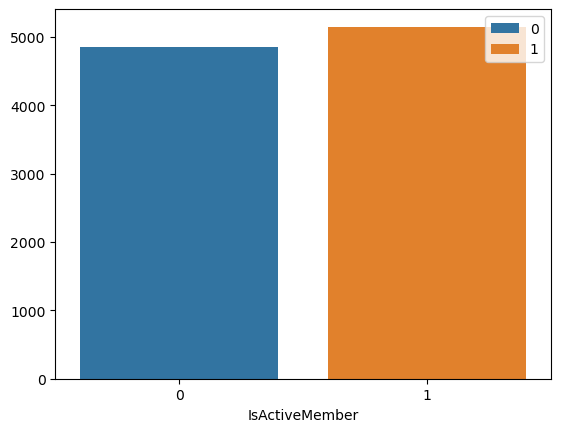

In [24]:
sns.barplot(
    x=df["IsActiveMember"].value_counts().keys(),
    y=df["IsActiveMember"].value_counts().values,
    hue=df["IsActiveMember"].unique(),
)

Here Active or Unactive Cutmore Both Have same Count

In [25]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [26]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

<Axes: xlabel='NumOfProducts'>

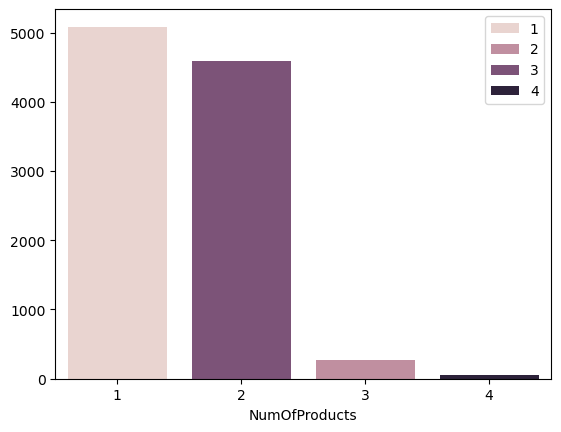

In [27]:
sns.barplot(
    x=df["NumOfProducts"].value_counts().keys(),
    y=df["NumOfProducts"].value_counts().values,
    hue=df["NumOfProducts"].unique(),
)

Here We can say that Mostly Custmore Have the 1 and 2 Product there are mostly less Customer Who have the 3 and 4 product

In [28]:
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [29]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

<Axes: xlabel='Tenure'>

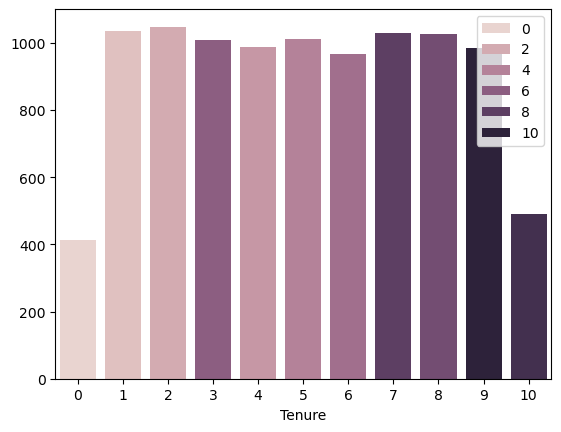

In [30]:
sns.barplot(
    x=df["Tenure"].value_counts().keys(),
    y=df["Tenure"].value_counts().values,
    hue=df["Tenure"].unique(),
)

In [31]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

Here there are Some colums which is not important for the Prediction so we can drop this columns

## Model Buliding

In [33]:
x = df.drop(columns=["Exited"])
y = df["Exited"]

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

#### Standard Scalar or One hot encoding

In [35]:
numeric = df.select_dtypes(exclude=["object"]).columns
catgorical = df.select_dtypes(include=["object"]).columns

In [36]:
numeric = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary",
]

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [38]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [39]:
column_transform = ColumnTransformer(
    [
        ("StandardScaler", StandardScaler(), numeric),
        ("onehotencoding", OneHotEncoder(), catgorical),
    ],
    remainder="passthrough",
)

In [40]:
column_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScaler', StandardScaler(),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('onehotencoding', OneHotEncoder(),
                                 Index(['Geography', 'Gender'], dtype='object'))])